# Country_Wide_COVID19_Datasets 

The dataset contains data about the numbers of tests, cases, deaths, serious/critical cases, active cases and recovered
cases in each country for every day since April 18, and also contains the population of each country to calculate 
per-capita penetration of the virus

Additionally, an auxiliary table with information about the fraction of the general population at different age groups
for every country is added (taken from Wikipedia). This is specifically relevant since COVID-19 death rate is very much
age dependent.

Acknowledgements
The people at "www.worldometers.info" collecting and maintaining this site really are doing very important work
https://www.worldometers.info/coronavirus/#countries

Data about age structure for every country comes from wikipedia

Inspiration
It's possible to use this dataset for various purposes and analyses
My goal will be to use the additional data about the number of tests performed in each country to estimate the true death
rate of COVID-19 and examine the relationship with age .(Consider the both files for understanding the scenario.)

https://github.com/dsrscientist/COVID_19_Datasets/blob/master/worldometer_snapshots_April18_to_May18.csv

https://github.com/dsrscientist/COVID_19_Datasets/blob/master/population_structure_by_age_per_contry.csv

So here we will use different regression methods to predict COVID-19 death rate of India and will forecast the death rate
till December 2020.

# 1-Data Exploration (Reading the data and attributes name)

In [1]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets import the covid19 country wide dataset and covid19 datset by age group
covid19_allcountry=pd.read_csv('covid19_countrywide.csv')
print(covid19_allcountry.shape)

covid19_byage=pd.read_csv('covid19_byage.csv')
print(covid19_byage.shape)

(6603, 9)
(213, 4)


In [3]:
#lets print the data
print(covid19_allcountry.head())

         Date Country  Population  Total Tests  Total Cases  Total Deaths  \
0  2020-04-18     USA   330774664    3722145.0     738792.0       39014.0   
1  2020-04-18  Russia   145927292    1831892.0      36793.0         313.0   
2  2020-04-18   Spain    46752703     930230.0     194416.0       20043.0   
3  2020-04-18  Brazil   212380932      62985.0      36722.0        2361.0   
4  2020-04-18      UK    67844241     460437.0     114217.0       15464.0   

   Total Recovered  Serious or Critical  Active Cases  
0          68269.0              13551.0      631509.0  
1           3057.0                  8.0       33423.0  
2          74797.0               7371.0       99576.0  
3          14026.0               6634.0       20335.0  
4              NaN               1559.0       98409.0  


In [5]:
#lets check is there any null value or not
covid19_allcountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [6]:
#lets check how many are there null values
covid19_allcountry.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [7]:
#lets print the data
print(covid19_byage.head())

  Country  Fraction age 0-14 years  Fraction age 15-64 years  \
0     USA                    0.189                     0.657   
1  Russia                    0.176                     0.682   
2   Spain                    0.147                     0.659   
3  Brazil                    0.217                     0.697   
4      UK                    0.177                     0.638   

   Fraction age 65+ years  
0                   0.154  
1                   0.142  
2                   0.194  
3                   0.086  
4                   0.185  


In [8]:
#lets check is there any null value or not
covid19_byage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   213 non-null    object 
 1   Fraction age 0-14 years   176 non-null    float64
 2   Fraction age 15-64 years  176 non-null    float64
 3   Fraction age 65+ years    176 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB


In [9]:
#lets check how many are there null values
covid19_byage.isnull().sum()

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

# 2-Exploratory Data Analysis (Exploring, Imputing, Cleaning & Visualizing)

In [19]:
#As we are going to analysis the data for India, so lets see the India's covid19 cases

covid19_India=covid19_allcountry.loc[covid19_allcountry['Country']=='India']
print(covid19_India.shape)

(31, 9)


In [20]:
#lets print the data of India cases
print(covid19_India.head())

           Date Country  Population  Total Tests  Total Cases  Total Deaths  \
10   2020-04-18   India  1378381772     335123.0      16365.0         521.0   
223  2020-04-19   India  1378381772     401586.0      17615.0         559.0   
436  2020-04-20   India  1378381772     401586.0      18539.0         592.0   
649  2020-04-21   India  1378381772     447812.0      20080.0         645.0   
862  2020-04-22   India  1378381772     462621.0      21370.0         681.0   

     Total Recovered  Serious or Critical  Active Cases  
10            2463.0                  NaN       13381.0  
223           2854.0                  NaN       14202.0  
436           3273.0                  NaN       14674.0  
649           3975.0                  NaN       15460.0  
862           4370.0                  NaN       16319.0  


In [22]:
#lets see the dataset description
covid19_India.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,3.100000e+01,3.100000e+01,31.000000,31.000000,31.000000,0.0,31.000000
mean,1.378382e+09,1.152194e+06,48909.612903,1589.258065,14998.451613,NaN,32410.225806
std,0.000000e+00,6.168781e+05,25750.075605,827.617020,10706.462537,NaN,14298.705799
min,1.378382e+09,3.351230e+05,16365.000000,521.000000,2463.000000,NaN,13381.000000
25%,1.378382e+09,6.026330e+05,27086.500000,853.000000,6231.000000,NaN,20002.500000
50%,1.378382e+09,1.046450e+06,42505.000000,1391.000000,11775.000000,NaN,29339.000000
75%,1.378382e+09,1.641362e+06,68964.500000,2253.000000,21759.000000,NaN,44952.500000
max,1.378382e+09,2.302792e+06,100328.000000,3156.000000,39233.000000,NaN,57939.000000


In [21]:
#lets check how many are there null values
covid19_India.isnull().sum()

Date                    0
Country                 0
Population              0
Total Tests             0
Total Cases             0
Total Deaths            0
Total Recovered         0
Serious or Critical    31
Active Cases            0
dtype: int64

In [23]:
#we saw there are no data for 'Serious or Critical', so we will drop this attribute from dataset

covid19_India=covid19_India.drop(['Serious or Critical'],axis=1)
print(covid19_India.shape)
print(covid19_India.isnull().sum())

(31, 8)
Date               0
Country            0
Population         0
Total Tests        0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
dtype: int64


In [24]:
#similarly we are going to analysis the data for India from age wise, so lets see the India's covid19 cases based on age wise

covid19_India_byage=covid19_byage.loc[covid19_byage['Country']=='India']
print(covid19_India_byage.shape)

(1, 4)


In [32]:
#So for our analysis, lets combine both datasets
covid19_India_final = pd.concat([covid19_India,covid19_India_byage],sort=False)
print(covid19_India_final.shape)

(32, 11)


In [33]:
#lets check how many are there null values
covid19_India_final.isnull().sum()

Date                         1
Country                      0
Population                   1
Total Tests                  1
Total Cases                  1
Total Deaths                 1
Total Recovered              1
Active Cases                 1
Fraction age 0-14 years     31
Fraction age 15-64 years    31
Fraction age 65+ years      31
dtype: int64

In [34]:
covid19_India_final

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
10,2020-04-18,India,1.378382e+09,335123.0,16365.0,521.0,2463.0,13381.0,NaN,NaN,NaN
223,2020-04-19,India,1.378382e+09,401586.0,17615.0,559.0,2854.0,14202.0,NaN,NaN,NaN
436,2020-04-20,India,1.378382e+09,401586.0,18539.0,592.0,3273.0,14674.0,NaN,NaN,NaN
649,2020-04-21,India,1.378382e+09,447812.0,20080.0,645.0,3975.0,15460.0,NaN,NaN,NaN
862,2020-04-22,India,1.378382e+09,462621.0,21370.0,681.0,4370.0,16319.0,NaN,NaN,NaN
1075,2020-04-23,India,1.378382e+09,500542.0,23039.0,721.0,5012.0,17306.0,NaN,NaN,NaN
1288,2020-04-24,India,1.378382e+09,541789.0,24447.0,780.0,5496.0,18171.0,NaN,NaN,NaN
1501,2020-04-25,India,1.378382e+09,579957.0,26283.0,825.0,5939.0,19519.0,NaN,NaN,NaN
1714,2020-04-26,India,1.378382e+09,625309.0,27890.0,881.0,6523.0,20486.0,NaN,NaN,NaN
1927,2020-04-27,India,1.378382e+09,665819.0,29451.0,939.0,7137.0,21375.0,NaN,NaN,NaN


In [37]:
#lets replace all the missing values in the dataset
covid19_India_final['Fraction age 0-14 years'].fillna(0.278, inplace = True)
covid19_India_final['Fraction age 15-64 years'].fillna(0.662, inplace = True) 
covid19_India_final['Fraction age 65+ years'].fillna(0.06, inplace = True) 

In [42]:
#now lets drop the rows with missing values
covid19_India_final=covid19_India_final.dropna()
#lets check how many are there null values
print(covid19_India_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 10 to 6400
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      31 non-null     object 
 1   Country                   31 non-null     object 
 2   Population                31 non-null     float64
 3   Total Tests               31 non-null     float64
 4   Total Cases               31 non-null     float64
 5   Total Deaths              31 non-null     float64
 6   Total Recovered           31 non-null     float64
 7   Active Cases              31 non-null     float64
 8   Fraction age 0-14 years   31 non-null     float64
 9   Fraction age 15-64 years  31 non-null     float64
 10  Fraction age 65+ years    31 non-null     float64
dtypes: float64(9), object(2)
memory usage: 2.9+ KB
None


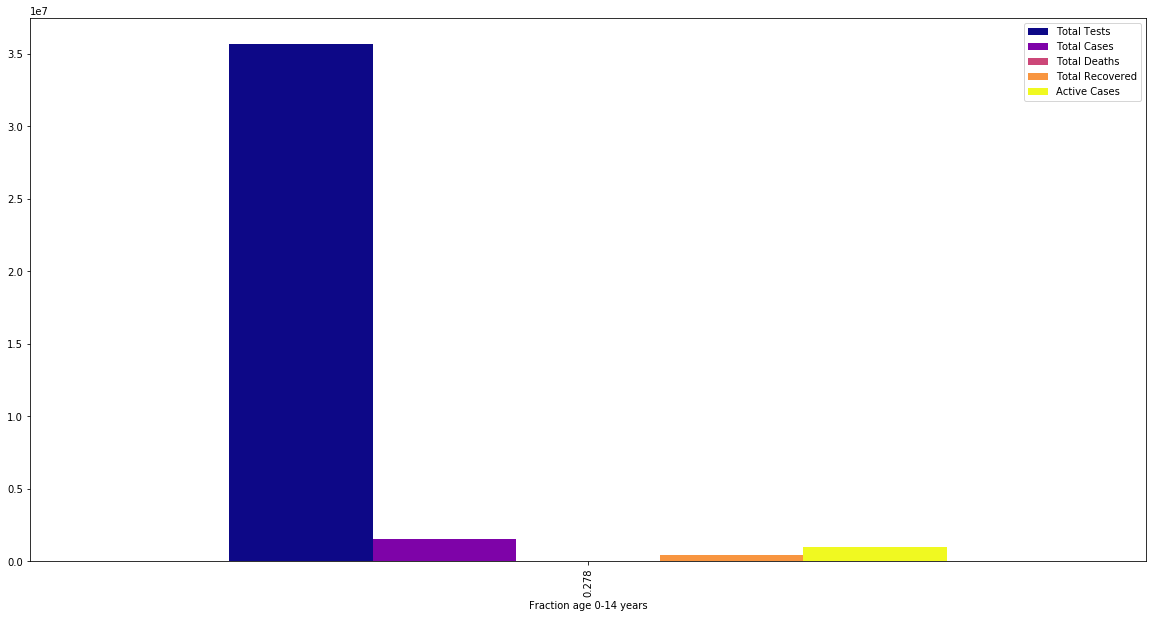

In [47]:
#lets see the covid cases wrt to 'Fraction age 0-14 years' 
cases=covid19_India_final[['Total Tests','Total Cases','Total Deaths','Total Recovered','Active Cases','Fraction age 0-14 years']].groupby('Fraction age 0-14 years').sum().sort_values('Total Deaths',ascending=False).head(10)
cases.plot(kind='bar',width=0.9,colormap='plasma',figsize=(20,10))
plt.show()

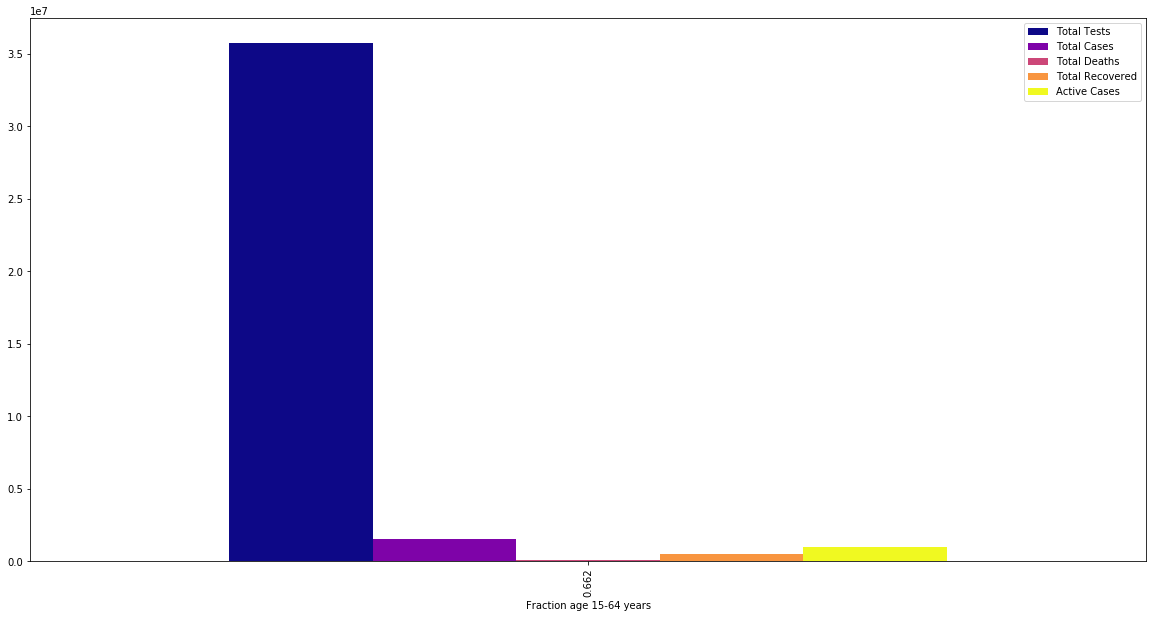

In [48]:
#lets see the covid cases wrt to 'Fraction age 15-64 years' 
cases=covid19_India_final[['Total Tests','Total Cases','Total Deaths','Total Recovered','Active Cases','Fraction age 15-64 years']].groupby('Fraction age 15-64 years').sum().sort_values('Total Deaths',ascending=False).head(10)
cases.plot(kind='bar',width=0.9,colormap='plasma',figsize=(20,10))
plt.show()

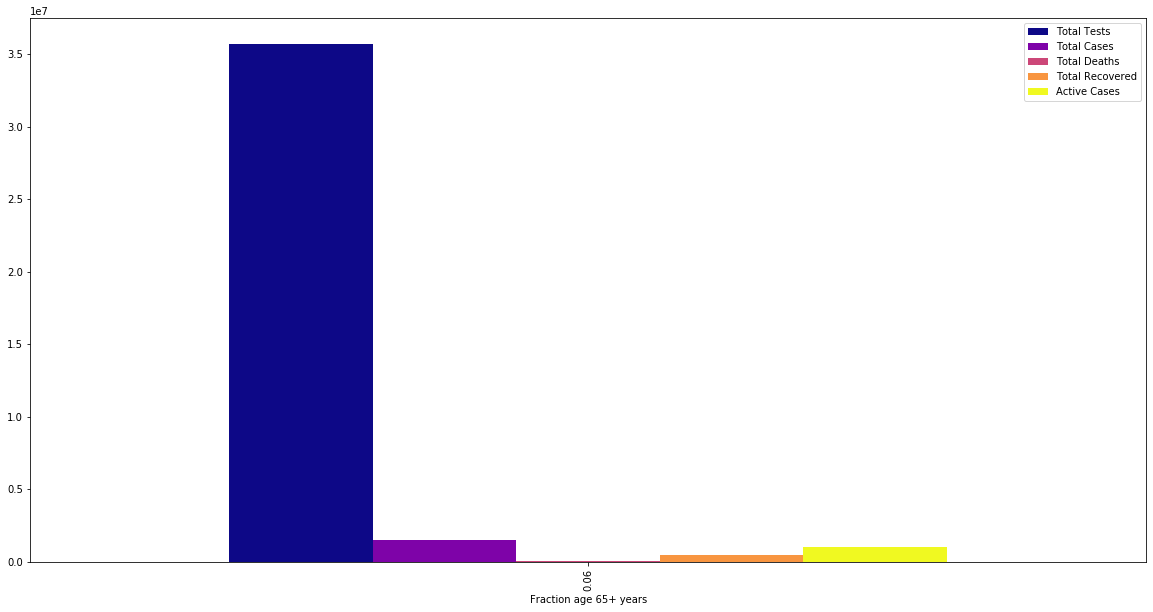

In [49]:
#lets see the covid cases wrt to 'Fraction age 65+ years' 
cases=covid19_India_final[['Total Tests','Total Cases','Total Deaths','Total Recovered','Active Cases','Fraction age 65+ years']].groupby('Fraction age 65+ years').sum().sort_values('Total Deaths',ascending=False).head(10)
cases.plot(kind='bar',width=0.9,colormap='plasma',figsize=(20,10))
plt.show()

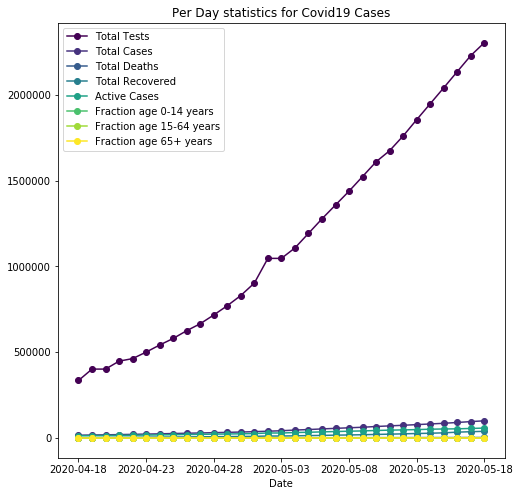

In [51]:
#lets see the exponential curve of worldwide covid19 cases
datewise_data = covid19_India_final.groupby('Date')['Total Tests','Total Cases','Total Deaths','Total Recovered','Active Cases','Fraction age 0-14 years','Fraction age 15-64 years','Fraction age 65+ years'].sum()
datewise_data.plot(figsize=(8,8),title='Per Day statistics for Covid19 Cases',colormap='viridis',marker='o')
plt.show()

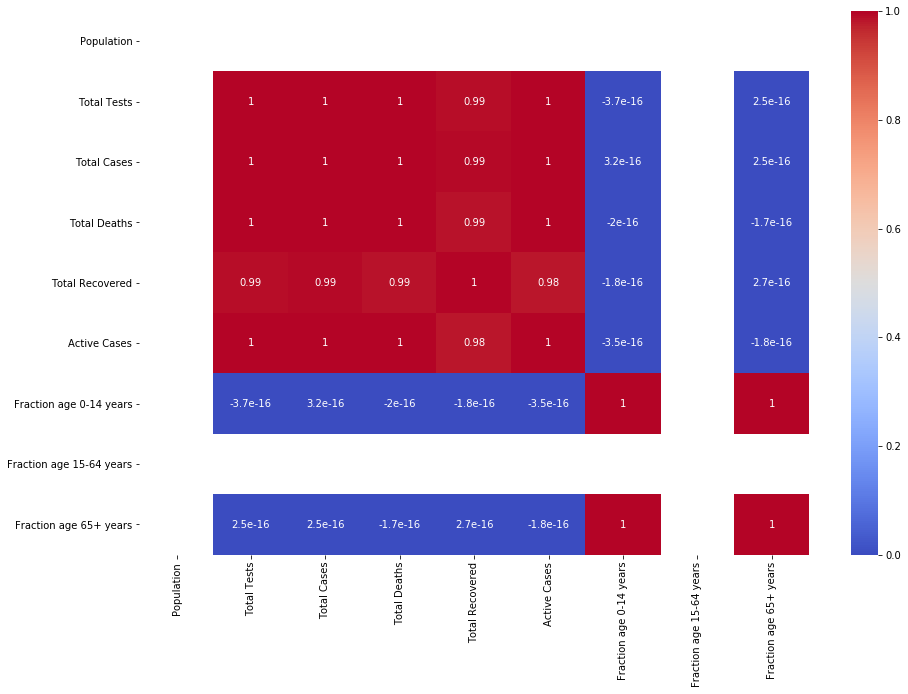

In [52]:
#lets see the corelation among data
plt.figure(figsize=(15,10))
sns.heatmap(covid19_India_final.corr(),cmap='coolwarm',annot=True)

# 3-Preparing the Train data for Model Building

In [53]:
#lets print the data
covid19_India_final.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
10,2020-04-18,India,1.378382e+09,335123.0,16365.0,521.0,2463.0,13381.0,0.278,0.662,0.06
223,2020-04-19,India,1.378382e+09,401586.0,17615.0,559.0,2854.0,14202.0,0.278,0.662,0.06
436,2020-04-20,India,1.378382e+09,401586.0,18539.0,592.0,3273.0,14674.0,0.278,0.662,0.06
649,2020-04-21,India,1.378382e+09,447812.0,20080.0,645.0,3975.0,15460.0,0.278,0.662,0.06
862,2020-04-22,India,1.378382e+09,462621.0,21370.0,681.0,4370.0,16319.0,0.278,0.662,0.06


In [56]:
#so here as we are going to find the death rates, so we will drop Date,Country,Population and Total Recovered attributes
covid19_India=covid19_India_final.drop(['Date','Country','Population','Total Recovered'],axis=1)

In [57]:
#lets print the data
covid19_India.head()

,Total Tests,Total Cases,Total Deaths,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
10,335123.0,16365.0,521.0,13381.0,0.278,0.662,0.06
223,401586.0,17615.0,559.0,14202.0,0.278,0.662,0.06
436,401586.0,18539.0,592.0,14674.0,0.278,0.662,0.06
649,447812.0,20080.0,645.0,15460.0,0.278,0.662,0.06
862,462621.0,21370.0,681.0,16319.0,0.278,0.662,0.06


In [58]:
# separating the input and output/target variables of dtrain

x=covid19_India.drop(columns=['Total Deaths'],axis=1)
y=covid19_India[['Total Deaths']]

print(x.shape)
print(y.shape)

(31, 6)
(31, 1)


# 4-Building Different Model and Finding the Best Model

In [59]:
#defining the models which will be used for model building
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.linear_model import Lasso
lsreg=Lasso()
from sklearn.linear_model import Ridge
lrreg=Ridge()
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [60]:
#appending all the models
models=[]
models.append(('LinearRegression',lreg))
models.append(('KNeighborsRegressor',knn))
models.append(('Lasso',lsreg))
models.append(('Ridge',lrreg))
models.append(('GradientBoostingRegressor',gbr))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rf))

In [61]:
#printing the output of each model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Model=[]
RState=[]
score=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    max_r2_score=0.0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr
            final_r_state=r_state
    print('Final Random State is:', final_r_state)
    print('\n')
    RState.append(final_r_state*1)
    print('R2 Score is:', max_r2_score)
    print('\n')
    score.append(max_r2_score*100)
    print('\n')

************************ LinearRegression **********************


Final Random State is: 87


R2 Score is: 0.9998798745104486




************************ KNeighborsRegressor **********************


Final Random State is: 53


R2 Score is: 0.9973797869211449




************************ Lasso **********************


Final Random State is: 87


R2 Score is: 0.9999196619751244




************************ Ridge **********************


Final Random State is: 87


R2 Score is: 0.9998798745409619




************************ GradientBoostingRegressor **********************


Final Random State is: 63


R2 Score is: 0.9967887660266944




************************ AdaBoostRegressor **********************


Final Random State is: 75


R2 Score is: 0.9930658492141835




************************ RandomForestRegressor **********************


Final Random State is: 64


R2 Score is: 0.9992551888998308






In [62]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Random_State':RState,'R2_Score':score})
print(result)

                       Model  Random_State   R2_Score
0           LinearRegression            87  99.987987
1        KNeighborsRegressor            53  99.737979
2                      Lasso            87  99.991966
3                      Ridge            87  99.987987
4  GradientBoostingRegressor            63  99.678877
5          AdaBoostRegressor            75  99.306585
6      RandomForestRegressor            64  99.925519


In [63]:
# So here Lasso is the best model,So lets build the final model with random_state=87

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=87)
lsreg=LinearRegression()
lsreg.fit(x_train,y_train)
y_pred=lsreg.predict(x_test)
print('R2 score is:',r2_score(y_test,y_pred))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score is: 0.9998798745104486
RMSE is: 9.472467796986304


In [64]:
#checking the mean r2 score and overfitting and underfitting using cross validation
from sklearn.model_selection import cross_val_score
print('Mean R2 score of Lasso Regression is:', cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation of Lasso Regression is:',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

Mean R2 score of Lasso Regression is: 0.962526925438512
Standard Deviation of Lasso Regression is: 0.019194385944635028


In [65]:
#lets predict the Death value
print('Actual Deaths:\n',y_test)
print('Predicted Deaths:\n',y_pred)

Actual Deaths:
       Total Deaths
6187        3025.0
2566        1154.0
223          559.0
5122        2415.0
4270        1985.0
2353        1079.0
862          681.0
Predicted Deaths:
 [[3018.32837647]
 [1139.14097809]
 [ 558.00742697]
 [2432.3298456 ]
 [1979.04202896]
 [1076.65586038]
 [ 676.47327147]]


In [66]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(lsreg,'lsreg_deaths.obj')

['lsreg_deaths.obj']

In [67]:
# load the model from the file
Deaths_from_joblib=joblib.load('lsreg_deaths.obj')

In [68]:
#Use the loaded model to make predictions against test data
Deaths_from_joblib.predict(x_test)

array([[3018.32837647],
       [1139.14097809],
       [ 558.00742697],
       [2432.3298456 ],
       [1979.04202896],
       [1076.65586038],
       [ 676.47327147]])

# Conclusion:
    
So here 'Lasso Regression Model' is the best model out of all model tested above and by looking this we can conclude
that our model is predicting around 99% of correct results for predicting the deaths from the covid19 cases.

# 5-Predicting/Forecasting Total Number of Cases for India till 31st December

Here we are going to generate the data till December end i.e. for 235 days ahead (as the data contain last date is 18th may)
of forecast of COVID-19. So we will use Prophet method for prediction.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

Will use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit 
with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal
effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically 
handles outliers well.

The input to Prophet is always a data frame with two columns: ds and y. The ds (datestamp) column should be of a format 
expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric 
and represents the measurement we wish to forecast.

In [69]:
#import the prophet library
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [98]:
#lets print the data
covid19_India_final.tail()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
5548,2020-05-14,India,1.378382e+09,1947041.0,81997.0,2649.0,27969.0,51379.0,0.278,0.662,0.06
5761,2020-05-15,India,1.378382e+09,2039952.0,85784.0,2753.0,30258.0,52773.0,0.278,0.662,0.06
5974,2020-05-16,India,1.378382e+09,2134277.0,90648.0,2871.0,34224.0,53553.0,0.278,0.662,0.06
6187,2020-05-17,India,1.378382e+09,2227642.0,95698.0,3025.0,36795.0,55878.0,0.278,0.662,0.06
6400,2020-05-18,India,1.378382e+09,2302792.0,100328.0,3156.0,39233.0,57939.0,0.278,0.662,0.06


In [75]:
#as here as we are going to forecast the death rates, so we will drop Country,Population and Total Recovered attributes
covid19_India_cases=covid19_India_final.drop(['Country','Population','Total Recovered'],axis=1)

In [88]:
#split the data on the basis of Deaths
deaths = covid19_India_cases.groupby('Date').sum()['Total Deaths'].reset_index()
totalcases= covid19_India_cases.groupby('Date').sum()['Total Cases'].reset_index()

In [82]:
#Forecasting India COVID19 Deaths Cases
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
print(deaths.tail())
m = Prophet(interval_width=0.95)
m.fit(deaths)
future_deaths_India = m.make_future_dataframe(periods=227)
print(future_deaths_India.tail())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


           ds       y
26 2020-05-14  2649.0
27 2020-05-15  2753.0
28 2020-05-16  2871.0
29 2020-05-17  3025.0
30 2020-05-18  3156.0
            ds
253 2020-12-27
254 2020-12-28
255 2020-12-29
256 2020-12-30
257 2020-12-31


In [89]:
#Forecasting India COVID19 Total Cases
totalcases.columns = ['ds','y']
totalcases['ds'] = pd.to_datetime(totalcases['ds'])
print(totalcases.tail())
m = Prophet(interval_width=0.95)
m.fit(totalcases)
future_totalcases_India = m.make_future_dataframe(periods=227)
print(future_totalcases_India.tail())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


           ds         y
26 2020-05-14   81997.0
27 2020-05-15   85784.0
28 2020-05-16   90648.0
29 2020-05-17   95698.0
30 2020-05-18  100328.0
            ds
253 2020-12-27
254 2020-12-28
255 2020-12-29
256 2020-12-30
257 2020-12-31


In [83]:
#predicting the future death acses with date, and upper and lower limit of y value
forecast_deaths_India = m.predict(future_deaths_India)
forecast_deaths_India[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
253,2020-12-27,29813.934496,602.091248,61104.011978
254,2020-12-28,29942.377696,569.435308,61426.020584
255,2020-12-29,30061.085255,529.246114,61716.094718
256,2020-12-30,30176.905083,486.545692,62021.140571
257,2020-12-31,30285.379052,445.839745,62297.850828


In [90]:
#predicting the future total cases with date, and upper and lower limit of y value
forecast_totalcases_India = m.predict(future_totalcases_India)
forecast_totalcases_India[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
253,2020-12-27,1.041388e+06,-175004.375830,2.314613e+06
254,2020-12-28,1.046017e+06,-181533.355888,2.328378e+06
255,2020-12-29,1.049684e+06,-188038.908005,2.341381e+06
256,2020-12-30,1.053466e+06,-194065.959910,2.354712e+06
257,2020-12-31,1.057347e+06,-200156.856070,2.367786e+06


In [85]:
#total no. of predicted death cases
print('predicted average Death cases:',forecast_deaths_India['yhat'].sum())
print('predicted lower limit Death cases:',forecast_deaths_India['yhat_lower'].sum())
print('predicted higher limit Death cases:',forecast_deaths_India['yhat_upper'].sum())

predicted average Death cases: 3856674.0045656925
predicted lower limit Death cases: 1065198.495367002
predicted higher limit Death cases: 6740301.465906759


In [91]:
#total no. of predicted total cases
print('predicted average total cases:',forecast_totalcases_India['yhat'].sum())
print('predicted lower limit total cases:',forecast_totalcases_India['yhat_lower'].sum())
print('predicted higher limit total cases:',forecast_totalcases_India['yhat_upper'].sum())

predicted average total cases: 133339887.19920614
predicted lower limit total cases: 20002395.216481034
predicted higher limit total cases: 252985474.51084152


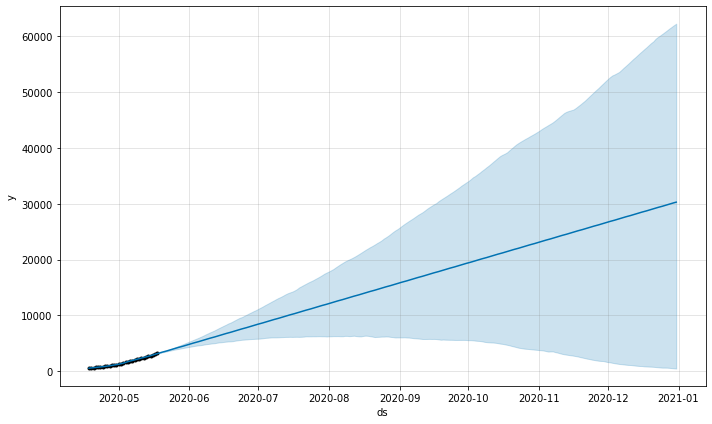

In [86]:
#lets plot the predicted model for deaths
deaths_forecast_plot_India = m.plot(forecast_deaths_India)

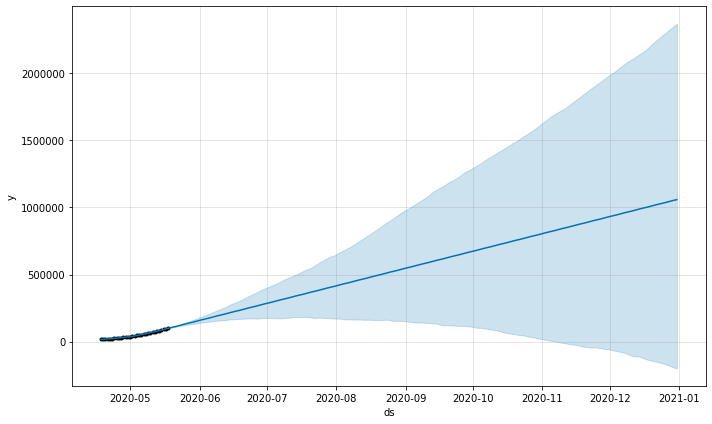

In [92]:
#lets plot the predicted model for totalcases
totalcases_forecast_plot_India = m.plot(forecast_totalcases_India)

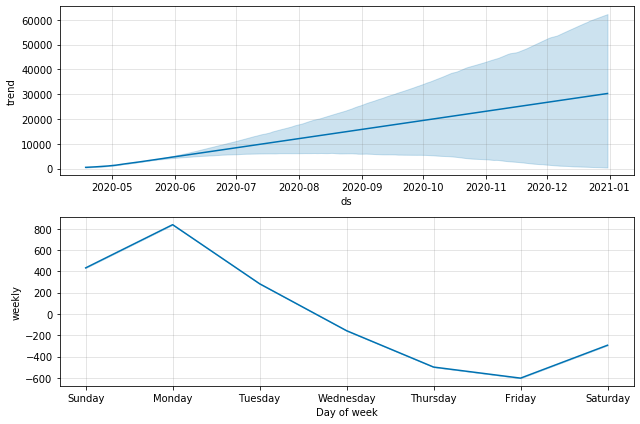

In [94]:
#lets print the components of the plot for deaths
deaths_forecast_plot_India =m.plot_components(forecast_deaths_India)

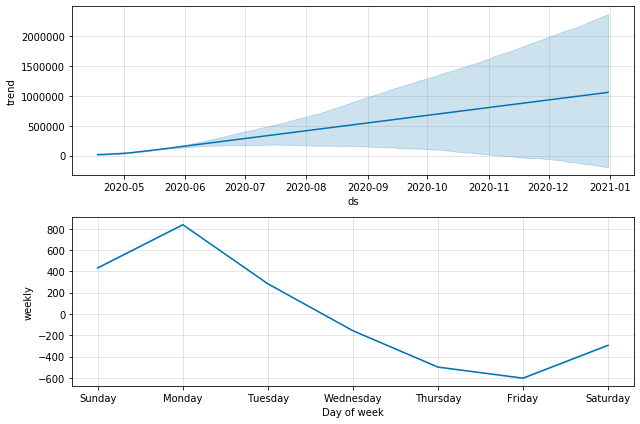

In [93]:
#lets print the components of the plot for total cases
deaths_forecast_plot_India =m.plot_components(forecast_totalcases_India)

# Conclusion:

As per data the summary of Covid19 cases in India, the total no of deaths will be increasing.

Now as per predicted data the summary of Covid19 deaths cases of India (till end of Dec 2020) is:

predicted average total cases: 133339887.19920614 and Death cases: 3856674.0045656925, so death rate is 0.029%

predicted lower limit total cases: 20002395.216481034 and Death cases: 1065198.495367002, so death rate is 0.053%

predicted higher limit total cases: 252985474.51084152 and Death cases: 6740301.465906759, so death rate is 0.027%

So the predictions shows as the days ahead, we are proceeding towards better recovery rate.